### <span style='color:blue '> Projet 7, Implémentez un modèle de scoring </span>

#### Notebook de modélisation

##### Librairies à importer

In [1]:
#Librairies à importer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time, pickle
import timeit
import lime.lime_tabular

In [7]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, fbeta_score
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate

In [8]:
from sklearn import preprocessing

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import roc_curve

In [43]:
from bayes_opt import BayesianOptimization

In [44]:
from sklearn import model_selection, kernel_ridge, linear_model
import statsmodels.api as sm
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

In [33]:
import shap

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/P7/')

#### Chargement des datasets 

In [16]:
df =  pd.read_csv("df_cleaned.csv")

In [17]:
df.head(10)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002     1.0                 0.0           0.0              1.0   
1      100003     0.0                 0.0           0.0              0.0   
2      100004     0.0                 1.0           1.0              1.0   
3      100006     0.0                 0.0           0.0              1.0   
4      100007     0.0                 0.0           0.0              1.0   
5      100008     0.0                 0.0           0.0              1.0   
6      100009     0.0                 0.0           1.0              1.0   
7      100010     0.0                 0.0           1.0              1.0   
8      100011     0.0                 0.0           0.0              1.0   
9      100012     0.0                 1.0           0.0              1.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          202500.0    406597.5      24700.5         351000.0   
1           0.0          270000.0   1293502.5      35698.5        1129500.0   
2           0.0           67500.0    135000.0       6750.0         135000.0   
3           0.0          135000.0    312682.5      29686.5         297000.0   
4           0.0          121500.0    513000.0      21865.5         513000.0   
5           0.0           99000.0    490495.5      27517.5         454500.0   
6           1.0          171000.0   1560726.0      41301.0        1395000.0   
7           0.0          360000.0   1530000.0      42075.0        1530000.0   
8           0.0          112500.0   1019610.0      33826.5         913500.0   
9           0.0          135000.0    405000.0      20250.0         405000.0   

   ...  ORGANIZATION_TYPE_Trade: type 6  ORGANIZATION_TYPE_Trade: type 7  \
0  ...                              0.0                              0.0   
1  ...                              0.0                              0.0   
2  ...                              0.0                              0.0   
3  ...                              0.0                              0.0   
4  ...                              0.0                              0.0   
5  ...                              0.0                              0.0   
6  ...                              0.0                              0.0   
7  ...                              0.0                              0.0   
8  ...                              0.0                              0.0   
9  ...                              0.0                              0.0   

   ORGANIZATION_TYPE_Transport: type 1  ORGANIZATION_TYPE_Transport: type 2  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   
5                                  0.0                                  0.0   
6                                  0.0                                  0.0   
7                                  0.0                                  0.0   
8                                  0.0                                  0.0   
9                                  0.0                                  0.0   

   ORGANIZATION_TYPE_Transport: type 3  ORGANIZATION_TYPE_Transport: type 4  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   
5                                  0.0                                  0.0   
6                                  0

In [18]:
df.set_index('SK_ID_CURR', inplace=True)

In [19]:
df.head()

TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR                                                              
100002         1.0                 0.0           0.0              1.0   
100003         0.0                 0.0           0.0              0.0   
100004         0.0                 1.0           1.0              1.0   
100006         0.0                 0.0           0.0              1.0   
100007         0.0                 0.0           0.0              1.0   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100002               0.0          202500.0    406597.5      24700.5   
100003               0.0          270000.0   1293502.5      35698.5   
100004               0.0           67500.0    135000.0       6750.0   
100006               0.0          135000.0    312682.5      29686.5   
100007               0.0          121500.0    513000.0      21865.5   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  ...  \
SK_ID_CURR                                               ...   
100002             351000.0                    0.018801  ...   
100003            1129500.0                    0.003541  ...   
100004             135000.0                    0.010032  ...   
100006             297000.0                    0.008019  ...   
100007             513000.0                    0.028663  ...   

            ORGANIZATION_TYPE_Trade: type 6  ORGANIZATION_TYPE_Trade: type 7  \
SK_ID_CURR                                                                     
100002                                  0.0                              0.0   
100003                                  0.0                              0.0   
100004                                  0.0                              0.0   
100006                                  0.0                              0.0   
100007                                  0.0                              0.0   

            ORGANIZATION_TYPE_Transport: type 1  \
SK_ID_CURR                                        
100002                                      0.0   
100003                                      0.0   
100004                                      0.0   
100006                                      0.0   
100007                                      0.0   

            ORGANIZATION_TYPE_Transport: type 2  \
SK_ID_CURR                                        
100002                                      0.0   
100003                                      0.0   
100004                                      0.0   
100006                                      0.0   
100007                                      0.0   

            ORGANIZATION_TYPE_Transport: type 3  \
SK_ID_CURR                                        
100002                                      0.0   
100003                                      0.0   
100004                                      0.0   
100006                                      0.0   
100007                                      0.0   

            ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  \
SK_ID_CURR                                                                      
100002                                      0.0                           0.0   
100003                                      0.0                           0.0   
100004                                      0.0                           0.0   
100006                                      0.0                           0.0   
100007                                      0.0                           0.0   

            ORGANIZATION_TYPE_XNA  EMERGENCYSTATE_MODE_No  \
SK_ID_CURR                                                  
100002                        0.0                     1.0   
100003                        0.0                     1.0   
100004                        0.0                     0.0   
100006                        0.0            

### <span style='color:blue '> 1- Pré-processing </span>


#### <span style='color:green'> 1.1. Standardisation des données </span>

L'échantillon rassemble des variables de grandeur différente, par exemple les salaires vs le nombre d'enfants, etc…

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaled_features = df.copy()

In [22]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(df)
scaled_train = scaler.transform(df)

In [23]:
#In order to keep our column names we include scaled_values to our train dataframes like this
df = pd.DataFrame(scaled_train, index=df.index, columns=df.columns)

In [24]:
df.head()

TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR                                                              
100002         1.0                 0.0           0.0              1.0   
100003         0.0                 0.0           0.0              0.0   
100004         0.0                 1.0           1.0              1.0   
100006         0.0                 0.0           0.0              1.0   
100007         0.0                 0.0           0.0              1.0   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100002               0.0          0.001512    0.090287     0.090032   
100003               0.0          0.002089    0.311736     0.132924   
100004               0.0          0.000358    0.022472     0.020025   
100006               0.0          0.000935    0.066837     0.109477   
100007               0.0          0.000819    0.116854     0.078975   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  ...  \
SK_ID_CURR                                               ...   
100002             0.077441                    0.256321  ...   
100003             0.271605                    0.045016  ...   
100004             0.023569                    0.134897  ...   
100006             0.063973                    0.107023  ...   
100007             0.117845                    0.392880  ...   

            ORGANIZATION_TYPE_Trade: type 6  ORGANIZATION_TYPE_Trade: type 7  \
SK_ID_CURR                                                                     
100002                                  0.0                              0.0   
100003                                  0.0                              0.0   
100004                                  0.0                              0.0   
100006                                  0.0                              0.0   
100007                                  0.0                              0.0   

            ORGANIZATION_TYPE_Transport: type 1  \
SK_ID_CURR                                        
100002                                      0.0   
100003                                      0.0   
100004                                      0.0   
100006                                      0.0   
100007                                      0.0   

            ORGANIZATION_TYPE_Transport: type 2  \
SK_ID_CURR                                        
100002                                      0.0   
100003                                      0.0   
100004                                      0.0   
100006                                      0.0   
100007                                      0.0   

            ORGANIZATION_TYPE_Transport: type 3  \
SK_ID_CURR                                        
100002                                      0.0   
100003                                      0.0   
100004                                      0.0   
100006                                      0.0   
100007                                      0.0   

            ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  \
SK_ID_CURR                                                                      
100002                                      0.0                           0.0   
100003                                      0.0                           0.0   
100004                                      0.0                           0.0   
100006                                      0.0                           0.0   
100007                                      0.0                           0.0   

            ORGANIZATION_TYPE_XNA  EMERGENCYSTATE_MODE_No  \
SK_ID_CURR                                                  
100002                        0.0                     1.0   
100003                        0.0                     1.0   
100004                        0.0                     0.0   
100006                        0.0            

#### <span style='color:green'> 1.2. Préparation des jeux d'entrainement et de test </span>

In [25]:
# Features : toutes les colonnes, sauf la cible
X = df.drop(['TARGET'], axis=1)

# Le cible
y = df[['TARGET']]

In [26]:
X.shape

(307511, 194)

In [27]:
y.shape

(307511, 1)

#### <span style='color:green'> 1.3. Séparation des jeux de données d'entraînement et de test </span>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215257, 194), (92254, 194), (215257, 1), (92254, 1))

In [30]:
data_reduce = X_test[:30,:]

In [31]:
data_reduce.shape

(30, 194)

In [32]:
pd.DataFrame(data_reduce).to_csv('dashboard_examples.csv')

#### <span style='color:green'> 1.4.Choix de la métrique </span>

**FP** (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative.

Perte d'opportunité si le crédit client est refusé à tort, alors qu'il aurait été en mesure d'être remboursé.

**FN** (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive.

Perte réelle si le crédit client accepté se transforme en défaut de paiement.

Ainsi, les pertes d'un crédit en raison d'une mauvaise classification dépendront des probabilités Faux Positifs et Faux Négatifs.

L'idée est d'éviter les clients avec un fort risque de défaut. Il est donc nécessaire de pénaliser les FP et FN cités précédemment. Pour réduire ce rique de perte financière, il faut maximiser deux critères Recall et Precision.

#### Costom_score

In [34]:
# score personalisé
# (2 * FP  + FN)/ total: on pénalise les faux positif et negatifs
# perte plus importante si un pret n'est pas remboursé que si on ne prend pas 1 client
def custom_metric(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    score=1-(((5*cm[1,0]) + cm[0, 1])/cm.sum())
    return score

custom_score= metrics.make_scorer(custom_metric, greater_is_better=True)

In [40]:
save_metrics =pd.DataFrame([], columns=['name', 'auc','accurancy', 'custom'])
def calculate_metrics_test(y_predictions):
    acc=metrics.accuracy_score( y_test, y_predictions)
    custom=custom_metric( y_test, y_predictions)
    fpr, tpr, thr = metrics.roc_curve(y_test, y_predictions)
    auc = metrics.auc(fpr, tpr)
    #print('AUC  :', auc)
    print('AUC :', roc_auc)
    print('Accurancy  :', acc)
    print('Score custom :', custom)

    return {'auc': auc,'accurancy': acc, 'custom': custom}

#### <span style='color:blue'> 2. Modélisation </span>

#### <span style='color:green'> 2.1. Modèle Baseline: Logistic Regression sur les données déséquilibres </span>

Le projet consiste à mieux comprendre le défaut de crédit rencontré chez certain client, l'anticiper, l'estimer, etc… La prédiction peut se résumer par une sortie binaire, une acceptation de crédit, ou un refus de crédit. Afin d'avoir une première idée des performances possibles, la modélisation par régression logistique permettra d'obtenir une baseline.

Nous allons donc créer un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu’ils améliorent les prédictions. 

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
%%time
model_baseline = LogisticRegression(C = 0.0001, max_iter=100)
model_baseline.fit(X_train, y_train)

Wall time: 702 ms


LogisticRegression(C=0.0001)

In [26]:
y_pred_base1= model_baseline.predict(X_test)

In [28]:
tab_auroc = []

y_prob_lr = model_baseline.predict_proba(X_test)[:, 1]
y_pred = model_baseline.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, model_baseline.predict(X_test)))

Aire sous la courbe ROC: 0.6864
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



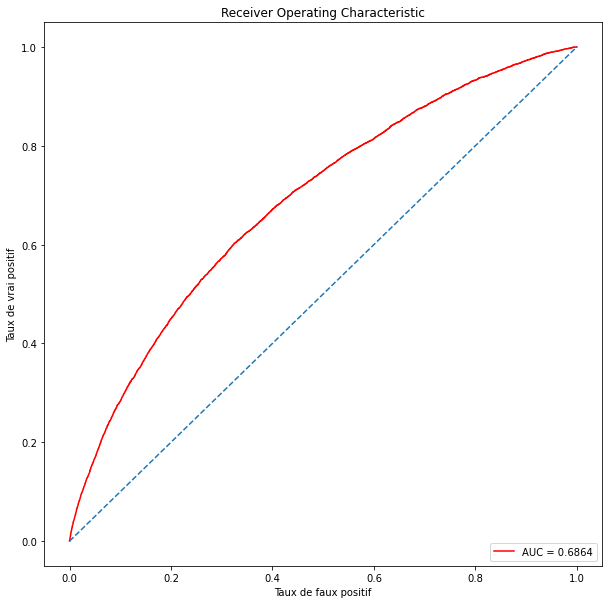

In [29]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

#### <span style='color:green'> 2.1.1. Suréchantillonnage des données à l'aide de SMOTE   </span>
#### SMOTE avec des données déséquilibres à l'aide du module imblearn
Pour rappel, l'échantillon de travail n'est pas équilibré, avec 92% des individus classés en modalité 0 et 8% en modalité 1, à savoir en défaut de paiement de crédit..

In [35]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: [17412] 
Label 0, Before using SMOTE: [197845] 


In [36]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [37]:
# Oversampling using smote on X_train
SMT = SMOTE(sampling_strategy='auto', k_neighbors=5,
           n_jobs=-1, random_state=14) #'minority'


X_train_SMOTE, y_train_SMOTE = SMT.fit_resample(X_train, y_train)

In [38]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_SMOTE==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_SMOTE==0)))

Label 1, After using SMOTE: 197845
Label 0, After using SMOTE: 197845


In [39]:
y.value_counts(normalize=True)

TARGET
0.0       0.5
1.0       0.5
dtype: float64

#### <span style='color:green'> 2.2. Logistic Regression sur les données équilibrées en utilisant un Grid search CV </span>

In [ ]:
%%time
model_baseline2 = LogisticRegression(C = 0.0001, max_iter=100)
model_baseline2.fit(X_train_SMOTE, y_train_SMOTE)

CPU times: user 13.5 s, sys: 2.09 s, total: 15.6 s
Wall time: 8.12 s


In [ ]:
y_pred_base2= model_baseline2.predict(X_test)

**Grid SearchCV, LogisticRegression**

In [38]:
# Grid search cross validation

from sklearn.linear_model import LogisticRegression
grid_b={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid_b,scoring= custom_score, cv=4)
logreg_cv.fit(X_train_SMOTE,y_train_SMOTE)


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(custom_metric))

In [39]:
best_model = logreg_cv.best_estimator_

In [40]:
y_pred_base= best_model.predict(X_test)
custom_metric

<function __main__.custom_metric(y_test, y_pred)>

In [41]:
print("best parameters:",logreg_cv.best_params_)

best parameters: {'C': 10.0, 'penalty': 'l2'}


In [42]:
from sklearn.metrics import auc

In [43]:
tab_auroc = []

y_prob_lr = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, best_model.predict(X_test)))

Aire sous la courbe ROC: 0.7369
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     84841
         1.0       0.16      0.65      0.25      7413

    accuracy                           0.69     92254
   macro avg       0.56      0.67      0.53     92254
weighted avg       0.89      0.69      0.76     92254



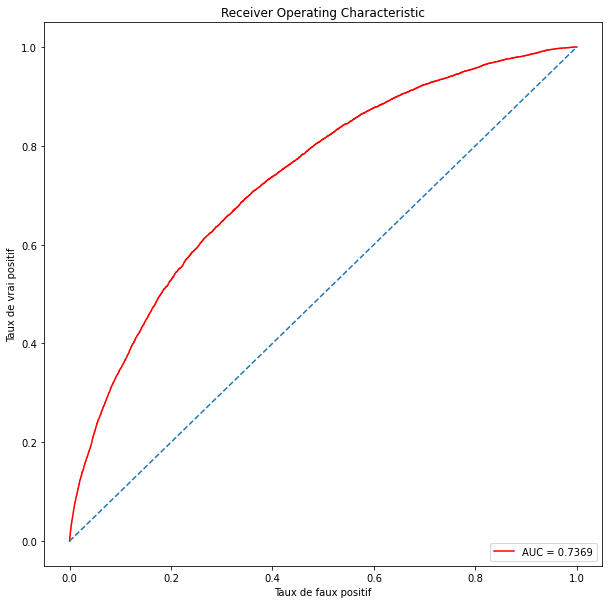

In [44]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

In [46]:
df_metrics=calculate_metrics_test(y_pred_base)
df_metrics['name']='regression logistique'
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

AUC : 0.7368565787179402
Accurancy  : 0.6929347236976174
Score custom : 0.5803325601057949


Feature: 0, Score: -0.29106
Feature: 1, Score: -0.39717
Feature: 2, Score: 0.13726
Feature: 3, Score: 0.26171
Feature: 4, Score: 0.07022
Feature: 5, Score: -0.07636
Feature: 6, Score: 4.78999
Feature: 7, Score: -4.54236
Feature: 8, Score: -0.02289
Feature: 9, Score: -0.53091
Feature: 10, Score: 0.85103
Feature: 11, Score: 0.24437
Feature: 12, Score: 0.43170
Feature: 13, Score: -0.23317
Feature: 14, Score: -0.27438
Feature: 15, Score: 0.06850
Feature: 16, Score: 0.40174
Feature: 17, Score: -0.17138
Feature: 18, Score: -0.35043
Feature: 19, Score: 0.25724
Feature: 20, Score: -0.58043
Feature: 21, Score: 0.75194
Feature: 22, Score: -0.05910
Feature: 23, Score: -0.24781
Feature: 24, Score: 0.03225
Feature: 25, Score: -0.22641
Feature: 26, Score: 0.03136
Feature: 27, Score: -0.04492
Feature: 28, Score: -0.03396
Feature: 29, Score: -1.98245
Feature: 30, Score: -2.84127
Feature: 31, Score: 0.12902
Feature: 32, Score: -0.22764
Feature: 33, Score: 0.19657
Feature: 34, Score: -0.28036
Feature: 3

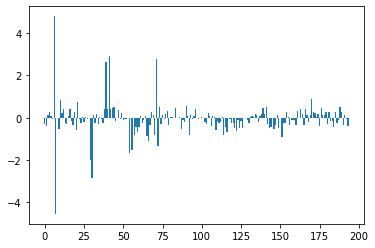

In [47]:
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Implémentation des modèles
#### <span style='color:green'> 2.3. XGBoost model </span>
#### <span style='color:green'> 2.3.1. XGBoost simple </span>

In [48]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
# fit model no training data
model1 = XGBClassifier()
model1.fit(X_train_SMOTE,y_train_SMOTE,eval_set=[(X_test,y_test),(X_train_SMOTE,y_train_SMOTE)],
          verbose=20,eval_metric='logloss')

[0]	validation_0-logloss:0.674994	validation_1-logloss:0.674047
[20]	validation_0-logloss:0.486351	validation_1-logloss:0.456902
[40]	validation_0-logloss:0.406626	validation_1-logloss:0.362523
[60]	validation_0-logloss:0.350026	validation_1-logloss:0.292688
[80]	validation_0-logloss:0.320334	validation_1-logloss:0.253083
[99]	validation_0-logloss:0.302321	validation_1-logloss:0.227886


XGBClassifier()

In [ ]:
# Prédiction sur le jeu de test
y_pred_1 = model1.predict(X_test)
predictions = [round(value) for value in y_pred_1]

In [ ]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_1)
df_metrics['name']='XG_Boost'

save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_1)

AUC : 0.6961729029717698
Accurancy  : 0.9171851627029722
Score custom : 0.6036594619203504
Le temps d'éxecution est : 0.2737300620010501


array([[84432,   409],
       [ 7231,   182]])

Feature: 0, Score: 0.00430
Feature: 1, Score: 0.01079
Feature: 2, Score: 0.03261
Feature: 3, Score: 0.00438
Feature: 4, Score: 0.04748
Feature: 5, Score: 0.00587
Feature: 6, Score: 0.02825
Feature: 7, Score: 0.02387
Feature: 8, Score: 0.01729
Feature: 9, Score: 0.01191
Feature: 10, Score: 0.00934
Feature: 11, Score: 0.00738
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02242
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.01173
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.05123
Feature: 19, Score: 0.01775
Feature: 20, Score: 0.00224
Feature: 21, Score: 0.01937
Feature: 22, Score: 0.05193
Feature: 23, Score: 0.01655
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.03391
Feature: 31, Score: 0.02076
Feature: 32, Score: 0.00392
Feature: 33, Score: 0.00420
Feature: 34, Score: 0.00390
Feature: 35, Score: 0.03309
Fe

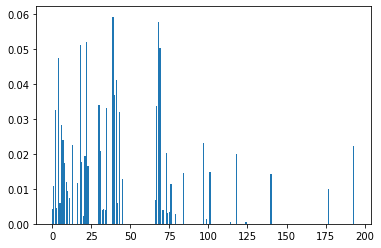

In [ ]:
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from xgboost import plot_importance
from matplotlib.pyplot import figure

In [ ]:
plt.figure(figsize=(20,10))

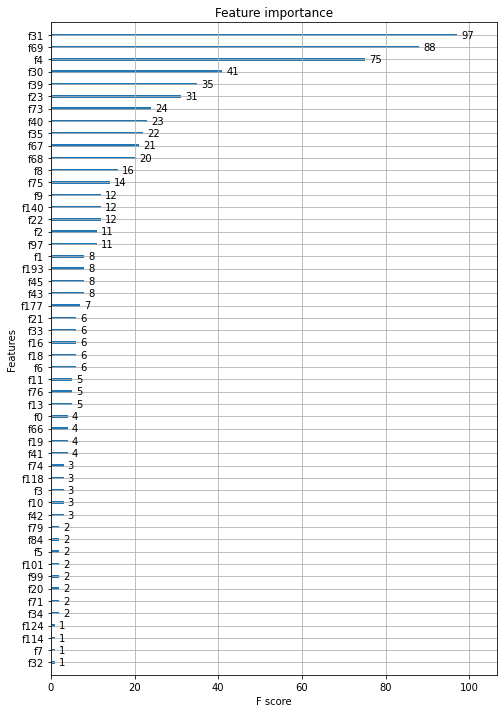

In [ ]:
plot_importance(model1,max_num_features=100)
plt.rcParams["figure.figsize"] = (8,12)
plt.show()

#### <span style='color:green'> 2.3.2. XGBoost à l'aide d'un Grid Search cv </span>

In [50]:
xgb_model = xgb.XGBClassifier()

param_xgb = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],"max_depth": [3, 4, 5],"learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    'silent': [1],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.7],
    'n_estimators': [5]
}

In [51]:
# Init Grid Search
grid_cv_xgb = GridSearchCV(xgb_model, param_xgb, n_jobs=-1, cv=3, scoring= custom_score)

In [52]:
# Fit
grid_cv_xgb.fit(X_train_SMOTE,y_train_SMOTE)


[22:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0, 0.25, 1],
                         'learning

In [53]:
print("best parameters:",grid_cv_xgb.best_params_)

best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 3, 'silent': 1, 'subsample': 0.8}


In [56]:
model_xgb = grid_cv_xgb.best_estimator_

In [57]:
y_pred_xgb = grid_cv_xgb.predict(X_test)

In [58]:
tab_auroc = []

y_prob_lr = grid_cv_xgb.predict_proba(X_test)[:, 1]
y_pred = grid_cv_xgb.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, grid_cv_xgb.predict(X_test)))

Aire sous la courbe ROC: 0.6422
              precision    recall  f1-score   support

         0.0       0.96      0.40      0.57     84841
         1.0       0.11      0.80      0.19      7413

    accuracy                           0.44     92254
   macro avg       0.53      0.60      0.38     92254
weighted avg       0.89      0.44      0.54     92254



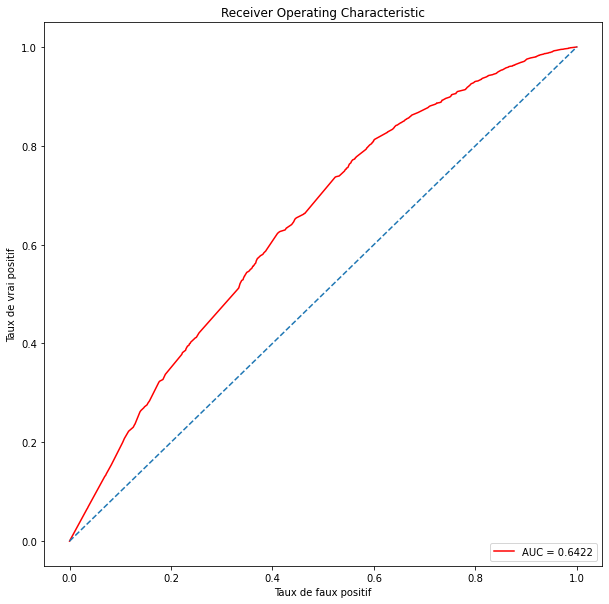

In [59]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

In [60]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_xgb)
df_metrics['name']='XGBoost'
df_metrics['params']= param_xgb
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_xgb)

AUC : 0.6422072296979175
Accurancy  : 0.43645803975979364
Score custom : 0.3737182127604223
Le temps d'éxecution est : 0.09911510000029011


array([[34299, 50542],
       [ 1447,  5966]], dtype=int64)

#### 2.3.2.1.Les Feautures importances

In [41]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:20]))), 
            df['importance_normalized'].head(20), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:20]))))
    ax.set_yticklabels(df['feature'].head(20))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [47]:
# Make the feature importance dataframe
feature_importances_xgb = pd.DataFrame({'feature': X.columns, 'importance': grid_cv_xgb.best_estimator_.feature_importances_})

xgb_importance_feature = plot_feature_importances(feature_importances_xgb)

NameError: name 'grid_cv_xgb' is not defined

#### 2.3.2.2. Interprétation avec Shap

In [63]:
explainer_xgb = shap.TreeExplainer(model_xgb)

In [64]:
shap_values = explainer_xgb.shap_values(X.values)

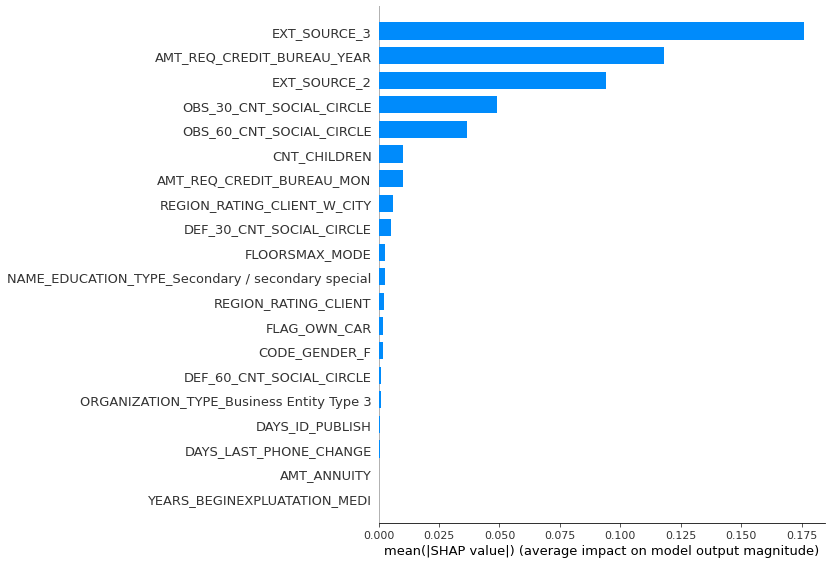

In [66]:
shap.summary_plot(shap_values, X_test, plot_type = "bar", feature_names=X.columns)

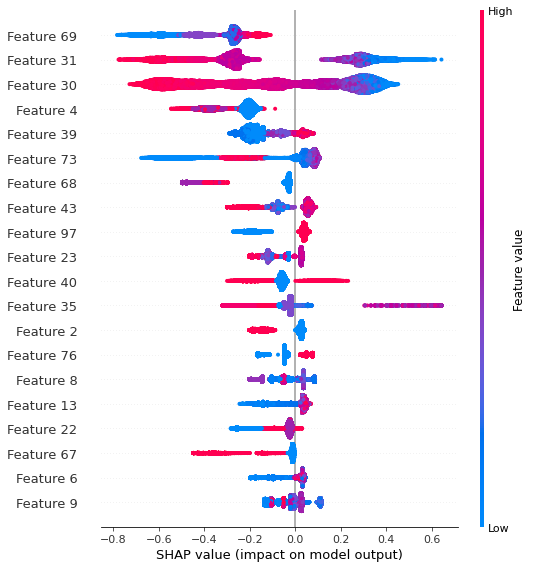

In [ ]:
shap.summary_plot(shap_values, X_test)

#### 2.3.2.3. Interprétation avec Lime

In [49]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=[0,1], verbose=True, mode='classification')

In [71]:
# Choose the jth instance and use it to predict the results for that selection
j = 1
exp = explainer.explain_instance(X.values[j], grid_cv_xgb.predict_proba, num_features=5)

Intercept 0.5994153438117611
Prediction_local [0.67921885]
Right: 0.3973499


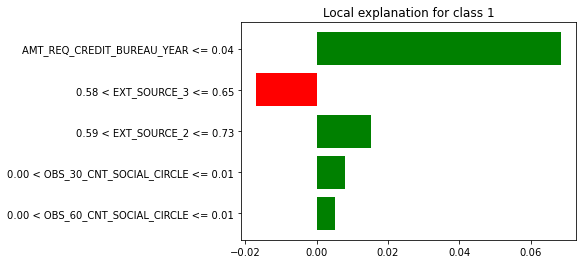

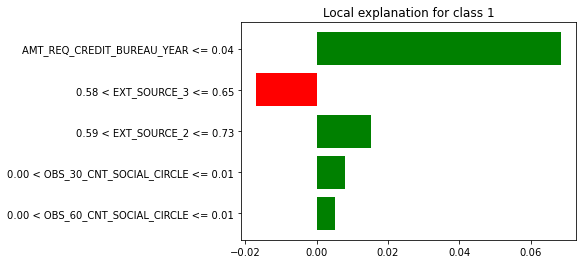

In [72]:
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()

#### <span style='color:green'> 2.4. LightGBM model </span>

#### <span style='color:green'> 2.4.1. Simple LightGBM</span>

- Nous devons convertir nos données au format de jeu de données LightGBM (cela est obligatoire pour developer un LightGBM).

- Après avoir créé l'ensemble de données nécessaire, nous avons créé un dictionnaire python avec des paramètres et leurs valeurs.

- La précision du modèle dépend des valeurs que nous fournissons aux paramètres.

- Dans le code final, nous avons simplement formé un modèle avec 100 itérations. 

In [42]:
 #!pip install lightgbm

In [42]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [ ]:
model2 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model2.fit(X_train_SMOTE,y_train_SMOTE,eval_set=[(X_test,y_test),(X_train_SMOTE,y_train_SMOTE)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.318084	training's binary_logloss: 0.318084	valid_0's binary_logloss: 0.368623	valid_0's binary_logloss: 0.368623
[40]	training's binary_logloss: 0.211425	training's binary_logloss: 0.211425	valid_0's binary_logloss: 0.292114	valid_0's binary_logloss: 0.292114
[60]	training's binary_logloss: 0.172285	training's binary_logloss: 0.172285	valid_0's binary_logloss: 0.267374	valid_0's binary_logloss: 0.267374
[80]	training's binary_logloss: 0.156175	training's binary_logloss: 0.156175	valid_0's binary_logloss: 0.258216	valid_0's binary_logloss: 0.258216
[100]	training's binary_logloss: 0.14712	training's binary_logloss: 0.14712	valid_0's binary_logloss: 0.253588	valid_0's binary_logloss: 0.253588


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
# Prédiction sur le jeu de test
y_pred_2=model2.predict(X_test)

In [ ]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_2)
df_metrics['name']='Light_GBM'

save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_2)

AUC : 0.6961729029717698
Accurancy  : 0.9194940056799705
Score custom : 0.6023261863984217
Le temps d'éxecution est : 0.2112207310001395


array([[84729,   112],
       [ 7315,    98]])

- y_test : Les vraies étiquettes de classe 
- y_pred : Les étiquettes de classe prédites dans l'ensemble de test.

#### Comparez la précision du train et test set 

Nous allons comparer la précision de train-set et test-set pour vérifier le surapprentissage

In [ ]:
y_pred_train = model2.predict(X_train_SMOTE)

#### Vérifier le surapprentissage 

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model2.score(X_train_SMOTE, y_train_SMOTE)))

print('Test set score: {:.4f}'.format(model2.score(X_test, y_test)))

Training set score: 0.9545
Test set score: 0.9195



Accuracy score pour le training et le test set est assez comparable. Donc, on ne peut pas dire qu'il y a surapprentissage.


In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84729   112]
 [ 7315    98]]

True Positives(TP) =  84729

True Negatives(TN) =  98

False Positives(FP) =  112

False Negatives(FN) =  7315


In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Métriques de classification

In [ ]:
roc_auc_2 = roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc_2)
print(classification_report(y_test, y_pred_2))

AUC : 0.7389
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.47      0.01      0.03      7413

    accuracy                           0.92     92254
   macro avg       0.69      0.51      0.49     92254
weighted avg       0.88      0.92      0.88     92254



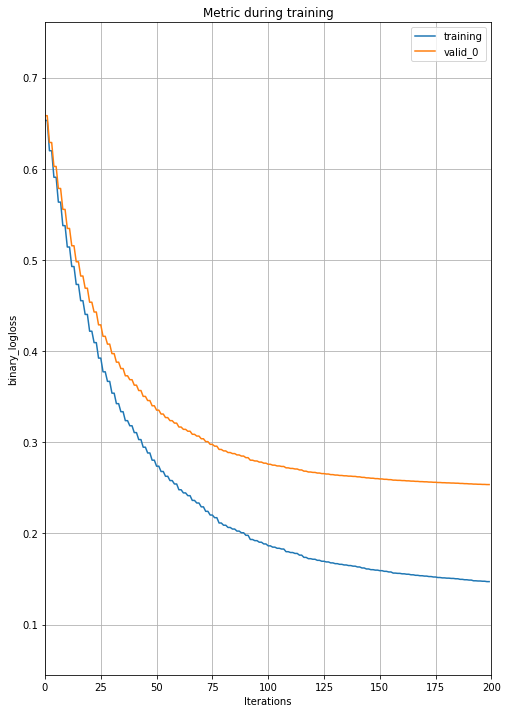

In [ ]:
lgb.plot_metric(model2)

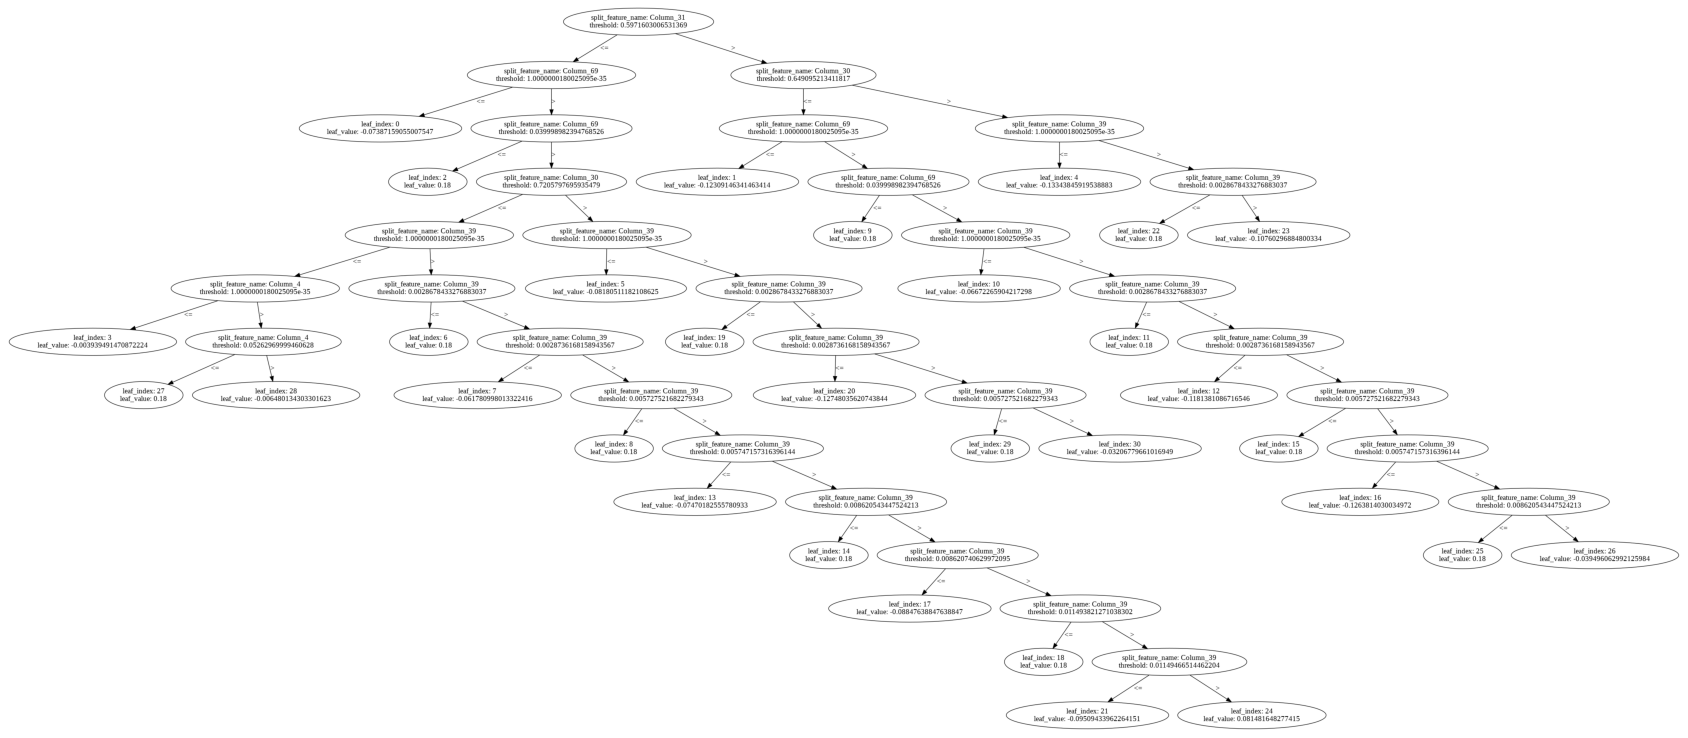

In [ ]:
lgb.plot_tree(model2,figsize=(30,40))

Feature: 0, Score: 14.00000
Feature: 1, Score: 50.00000
Feature: 2, Score: 72.00000
Feature: 3, Score: 20.00000
Feature: 4, Score: 116.00000
Feature: 5, Score: 67.00000
Feature: 6, Score: 35.00000
Feature: 7, Score: 16.00000
Feature: 8, Score: 104.00000
Feature: 9, Score: 89.00000
Feature: 10, Score: 53.00000
Feature: 11, Score: 30.00000
Feature: 12, Score: 7.00000
Feature: 13, Score: 28.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 3.00000
Feature: 16, Score: 24.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 23.00000
Feature: 19, Score: 14.00000
Feature: 20, Score: 2.00000
Feature: 21, Score: 18.00000
Feature: 22, Score: 49.00000
Feature: 23, Score: 321.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 12.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 121.00000
Feature: 31, Score: 116.00000
Feature: 32, Score: 5.00000
Feature: 33, Score: 13.00000
Feature: 34, Score: 9.00000
Fe

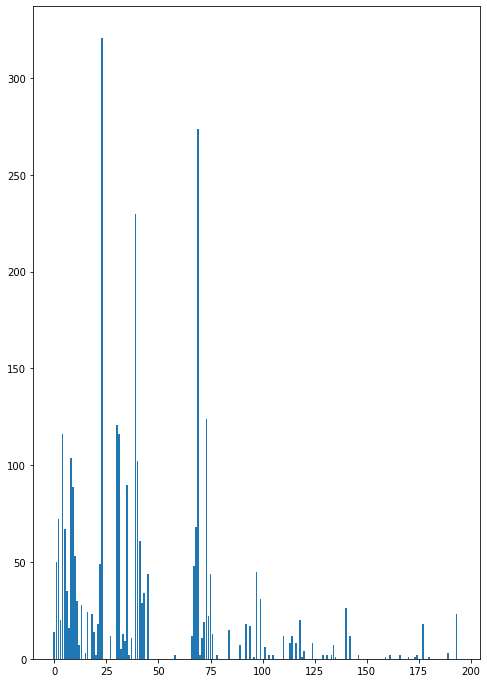

In [ ]:
importance = model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### <span style='color:green'> 2.4.2. Trouver les meilleurs hyperparamètres avec Bayesian methode pour LightGBM Model </span>

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def custom_metric_gbm(y_pred, dataset_true):
    print('CUSTOM',y_pred, dataset_true )
    y_true = dataset_true.get_label()
    preds = y_pred.reshape(-1, 4)  # I should have reshaped pred
    preds = preds.argmax(axis = 1)
    cm = confusion_matrix(y_true, preds)
    score=1-(((2*cm[1,0]) + cm[0, 1])/cm.sum())
    return 'custom', score, True

custom_score_gbm= metrics.make_scorer(custom_metric_gbm, greater_is_better=True)

def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=5, random_seed=6, n_estimators=10000,
                            learning_rate=0.05, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y) #, categorical_feature = categorical_feats, free_raw_data=False
    # parameters
    def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1,
                 lambda_l2, min_split_gain, min_child_weight):
        params = {'application':'binary','num_iterations': n_estimators, 'learning_rate':learning_rate,
                  'early_stopping_round':100, 'metric':'auc', 'class_weight': [None, 'balanced']}
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True,
                           verbose_eval =200,metrics=['auc'])
        return max(cv_result['auc-mean'])
        # range 
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 8.99),
                                            'lambda_l1': (0, 5),
                                            'lambda_l2': (0, 3),
                                            'min_split_gain': (0.001, 0.1),
                                            'min_child_weight': (5, 50),
                
                                           }, random_state=0)
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    # output optimization process
    # if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
    # return best parameters
    return lgbBO.max['params']


starttime = timeit.default_timer()
opt_params = bayes_parameter_opt_lgb(X_train_SMOTE, y_train_SMOTE, init_round=5, opt_round=10, n_folds=5, random_seed=6,
                                     n_estimators=100, learning_rate=0.05)
print(opt_params)
print("Le temps d'éxecution est :", timeit.default_timer() - starttime)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9744   |  0.9098   |  0.6722   |  3.014    |  1.635    |  6.69     |  34.07    |  0.04432  |  42.73    |
|  2        |  0.9734   |  0.9927   |  0.4068   |  3.959    |  1.587    |  7.266    |  46.65    |  0.008033 |  25.83    |
|  3        |  0.9751   |  0.804    |  0.7661   |  3.891    |  2.61     |  8.905    |  40.96    |  0.04669  |  40.39    |
|  4        |  0.9743   |  0.8237   |  0.6119   |  0.7168   |  2.834    |  7.082    |  23.66    |  0.02719  |  40.26    |
|  5        |  0.9742   |  0.8912   |  0.5547   |  0.09395  |  1.853    |  7.442    |  32.76    |  0.09443  |  38.32    |
|  6        |  0.9745   |  0.9912   |  0.2578   |  3.399    |  2.846    |  8.185    |  43.95    |  0.04258  |  44.43    |
|  7        |  0.9735   

#### <span style='color:green'> 2.4.3. LightGBM à l'aide d'un Grid Search cv </span>

In [43]:
param_lgb ={'learning_rate' : [0.01]}


clf_lgb = lgb.LGBMClassifier(boosting_type='gbdt',\
                   num_leaves=31, \
                   max_depth=8, \
                   n_estimators=100, \
                   objective='binary', \
                   min_child_weight=0.001, \
                   min_child_samples=40, \
                   subsample=1.0, \
                   subsample_freq=0, \
                   colsample_bytree=1.0, \
                   reg_alpha=0.0, \
                   reg_lambda=0.0, \
                   random_state=None,\
                   n_jobs=-1,\
                   silent=True, \
                  
                  )

In [44]:
grid_lgb = GridSearchCV(
                    estimator=clf_lgb,
                    param_grid = param_lgb, 
                    scoring= custom_score,
                    cv=5
                  )

In [45]:
grid_lgb.fit(X_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=8, min_child_samples=40,
                                      objective='binary', silent=True),
             param_grid={'learning_rate': [0.01]},
             scoring=make_scorer(custom_metric))

In [46]:
model_lgb = grid_lgb.best_estimator_

In [47]:
grid_lgb.best_params_

{'learning_rate': 0.01}

In [48]:
y_pred_lgb = grid_lgb.predict(X_test)

In [49]:
grid_lgb.best_estimator_.score(X_test, y_test)

0.8761354521213173

In [50]:
tab_auroc = []

y_prob_lr = grid_lgb.predict_proba(X_test)[:, 1]
y_pred = grid_lgb.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, grid_lgb.predict(X_test)))

Aire sous la courbe ROC: 0.6638
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     84841
         1.0       0.17      0.14      0.15      7413

    accuracy                           0.88     92254
   macro avg       0.55      0.54      0.54     92254
weighted avg       0.86      0.88      0.87     92254



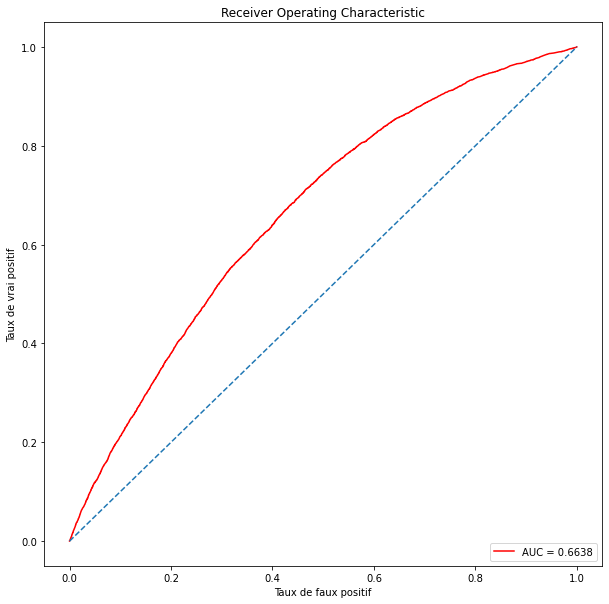

In [51]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

In [53]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(y_pred_lgb)
df_metrics['name']='LightGBM'
df_metrics['params']= clf_lgb
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, y_pred_lgb)

AUC : 0.6637921352547342
Accurancy  : 0.8761354521213173
Score custom : 0.5982504823639083
Le temps d'éxecution est : 0.062248100000005024


array([[79823,  5018],
       [ 6409,  1004]], dtype=int64)

### Pipeline de prédiction-Partie concernant mlflow

A l'aide d'un pipeline,nous allons regrouper la standardisation et notre estimator de LightGbm dans un seul outil.

In [54]:
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline

In [55]:
pipeline = pipeline.Pipeline([('scaler', MinMaxScaler(feature_range = (0, 1))), 
                               ('estimator', lgb.LGBMClassifier(**grid_lgb.best_params_))])

In [56]:
pipeline.fit(X_train_SMOTE, y_train_SMOTE)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', LGBMClassifier(learning_rate=0.01))])

In [57]:
pipeline.score(X_test, y_test)

0.9083291781386172

In [58]:
import joblib

In [59]:
joblib.dump(pipeline, 'pipeline_scoring.joblib')

['pipeline_scoring.joblib']

#### 2.3.2.1. Feature Importance 

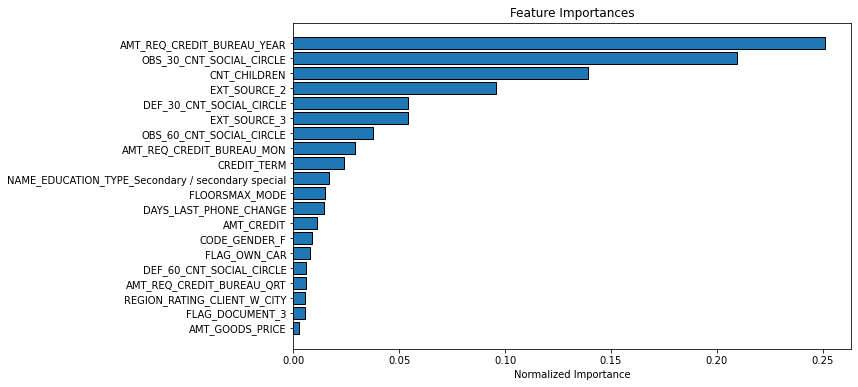

In [59]:
# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': grid_lgb.best_estimator_.feature_importances_})

lgb_importance_feature = plot_feature_importances(feature_importances)

In [68]:
plt.savefig('barplot.png')

<Figure size 432x288 with 0 Axes>

In [69]:
joblib.dump(feature_importances, 'most_important_features.joblib')

['most_important_features.joblib']

In [66]:
import pickle
# now you can save it to a file
with open('final_model.pkl', 'wb') as f:
    pickle.dump(grid_lgb, f)

In [87]:
from sklearn.inspection import permutation_importance

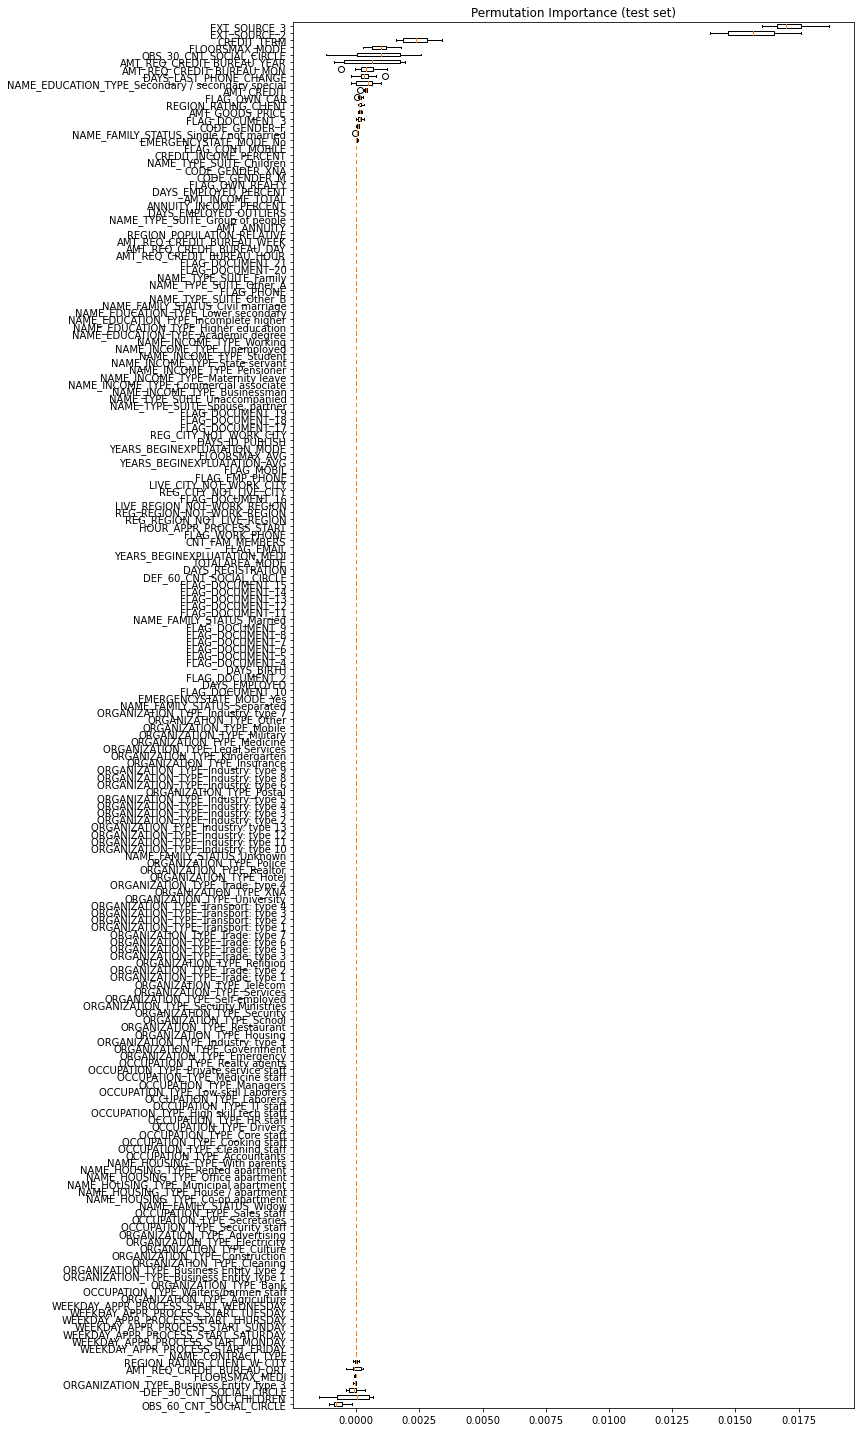

In [89]:
fig = plt.figure(figsize=(20, 20))
result = permutation_importance(grid_lgb, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

#### 2.3.2.2. Interprétation avec Lime

Intercept 0.6415261746194578
Prediction_local [0.79190849]
Right: 0.23717009606937534


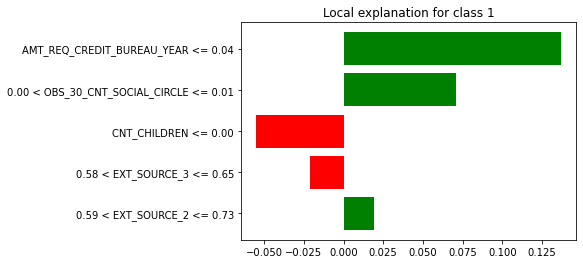

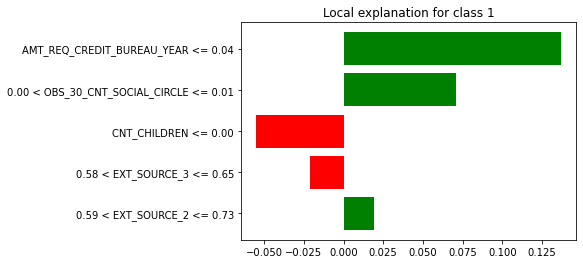

In [70]:
# Choose the jth instance and use it to predict the results for that selection
j = 1
exp_lgb = explainer.explain_instance(X.values[j], grid_lgb.predict_proba, num_features=5)

exp_lgb.show_in_notebook(show_table=True)
exp_lgb.as_pyplot_figure()

**Sauvgarde de Lime**

In [91]:
import dill

In [92]:
with open('Lime.pkl', 'wb') as f:
    dill.dump(exp_lgb, f)

#### 2.3.2.3. Interprétation avec Shap

In [71]:
explainer = shap.TreeExplainer(model_lgb)

In [72]:
shap_values = explainer.shap_values(X.values)

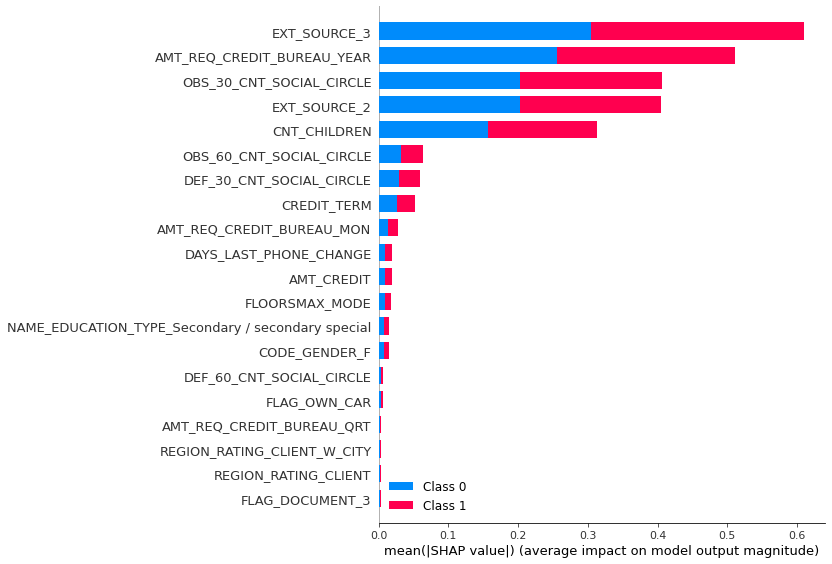

In [73]:
shap.summary_plot(shap_values, X_test, plot_type = "bar", feature_names=X.columns)

In [97]:
with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

### Signature d'un modèle

Afin de garantir que les données d'entrée d'un modèle sont conformes à ce qui est attendu, les modèles MLflow peuvent inclure des metadatas décrivant les entrées et sorties :

- Model Signature - description des entrées et sorties du modèle
- Model Input Example - exemple d'une entrée valide
La signature du modèle permet de renseigner le nom des colonnes et leurs types afin de vérifier si ils sont similaires lors de la prédiction.

In [2]:
#! pip install mlflow

In [67]:
import mlflow

In [62]:
import mlflow.sklearn

In [60]:
from mlflow.models.signature import infer_signature

In [61]:
signature = infer_signature(X_train_SMOTE, y_train_SMOTE)

In [71]:
mlflow.sklearn.save_model(pipeline, 'mlflow_model', signature=signature)

MlflowException: Path 'mlflow_model' already exists

#### <span style='color:green'> 2.5. Forêt aléatoire </span>
#### <span style='color:green'> 2.5.1. Forêt aléatoire simple </span>

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model3 = RandomForestClassifier(n_estimators = 100, random_state = 24)
model3.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_3 = model3.predict(X_test)

KeyboardInterrupt: 

In [ ]:
accuracy_3 = accuracy_score(y_pred_3, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_3)))

LightGBM Model accuracy score: 0.9177


In [ ]:
roc_auc_3 = roc_auc_score(y_test, model3.predict_proba(X_test)[:,1])
print('AUC : %0.4f' %roc_auc_3)
print(classification_report(y_test, y_pred_3))

AUC : 0.7056
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.29      0.02      0.03      7413

    accuracy                           0.92     92254
   macro avg       0.61      0.51      0.49     92254
weighted avg       0.87      0.92      0.88     92254



In [ ]:
# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': X.columns, 'importance':  model3.feature_importances_})

fi_sorted = plot_feature_importances(feature_importances)

Feature: 0, Score: 0.01391
Feature: 1, Score: 0.00360
Feature: 2, Score: 0.00966
Feature: 3, Score: 0.00628
Feature: 4, Score: 0.04167
Feature: 5, Score: 0.01426
Feature: 6, Score: 0.01782
Feature: 7, Score: 0.01514
Feature: 8, Score: 0.02166
Feature: 9, Score: 0.01995
Feature: 10, Score: 0.01804
Feature: 11, Score: 0.01328
Feature: 12, Score: 0.01438
Feature: 13, Score: 0.01891
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00076
Feature: 16, Score: 0.00371
Feature: 17, Score: 0.00008
Feature: 18, Score: 0.00792
Feature: 19, Score: 0.00273
Feature: 20, Score: 0.03675
Feature: 21, Score: 0.01967
Feature: 22, Score: 0.02087
Feature: 23, Score: 0.01605
Feature: 24, Score: 0.00044
Feature: 25, Score: 0.00100
Feature: 26, Score: 0.00085
Feature: 27, Score: 0.00221
Feature: 28, Score: 0.00240
Feature: 29, Score: 0.00218
Feature: 30, Score: 0.04751
Feature: 31, Score: 0.05683
Feature: 32, Score: 0.00778
Feature: 33, Score: 0.01656
Feature: 34, Score: 0.00759
Feature: 35, Score: 0.02016
Fe

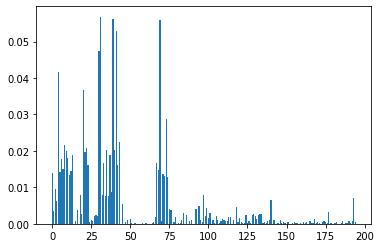

In [ ]:
# get importance
importance = model3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Intercept 0.8116066270982335
Prediction_local [0.81729121]
Right: 0.07


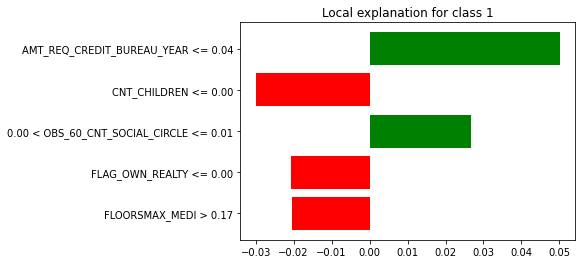

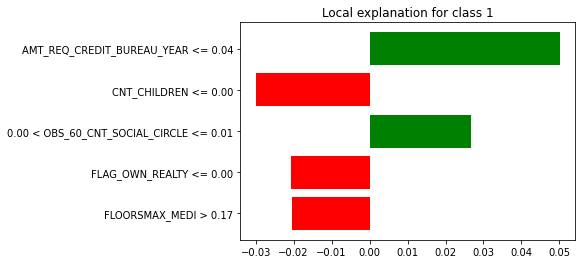

In [ ]:
# Choose the jth instance and use it to predict the results for that selection
j = 1
exp_RF = explainer.explain_instance(X.values[j], model3.predict_proba, num_features=5)

exp_RF.show_in_notebook(show_table=True)
exp_RF.as_pyplot_figure()

#### <span style='color:green'> 2.5.2. Forêt aléatoire utilisant un GridSearchCV  </span>

In [100]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [101]:
# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid_rfc = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid_rfc.fit(X_train_SMOTE, y_train_SMOTE)

In [102]:
grid_rfc.best_params_

{'max_depth': 16, 'n_estimators': 256}

In [ ]:
pred_rfc=grid_rfc.predict(X_test)

In [ ]:
tab_auroc = []

y_prob_lr = grid_rfc.predict_proba(X_test)[:, 1]
y_pred = grid_rfc.predict(X_test)


false_positive_rate, true_positive_rate, thresholds =  \
                            roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)

tab_auroc.append(roc_auc)

print("Aire sous la courbe ROC: {:.4f}".format(roc_auc))

print(classification_report(y_test, grid_rfc.predict(X_test)))

Aire sous la courbe ROC: 0.6962
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     84841
         1.0       0.22      0.12      0.15      7413

    accuracy                           0.90     92254
   macro avg       0.57      0.54      0.55     92254
weighted avg       0.87      0.90      0.88     92254



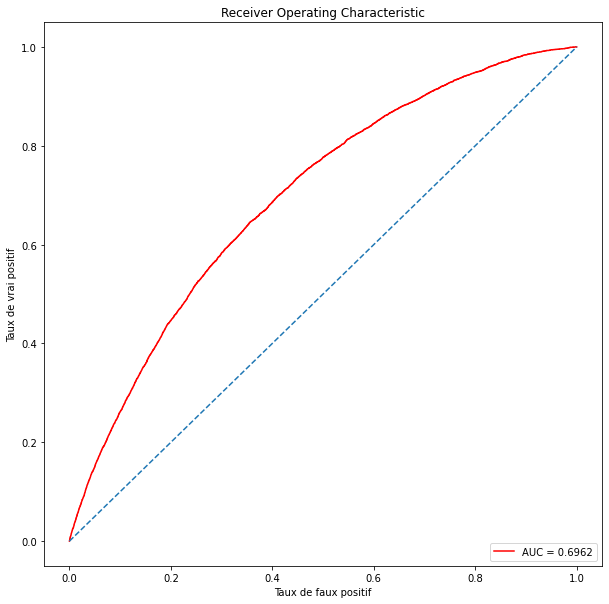

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red',
         label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('Taux de vrai positif')
plt.xlabel('Taux de faux positif')
plt.show()

([<matplotlib.axis.YTick at 0x7ff4c1d1f950>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

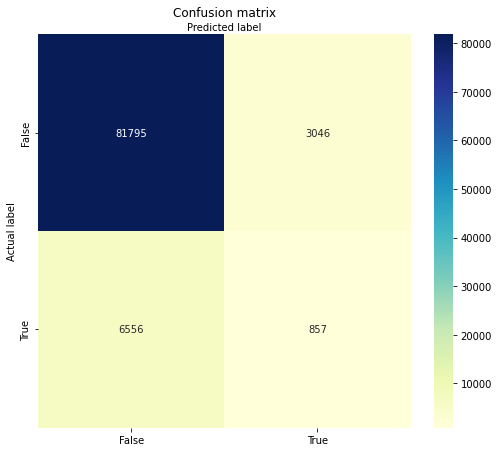

In [ ]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_rfc)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [ ]:
starttime = timeit.default_timer()
df_metrics=calculate_metrics_test(pred_rfc)
df_metrics['name']='Random Forest'
df_metrics['params']= param_grid
save_metrics=save_metrics.append(df_metrics,ignore_index=True)

print("Le temps d'éxecution est :", timeit.default_timer() - starttime)
confusion_matrix(y_test, pred_rfc)

AUC : 0.6961729029717698
Accurancy  : 0.8959177921824528
Score custom : 0.6116591150519219
Le temps d'éxecution est : 0.12945833099911397


array([[81795,  3046],
       [ 6556,   857]])

In [ ]:
# Make the feature importance dataframe
feature_importances_rfc = pd.DataFrame({'feature': X.columns, 'importance': grid_rfc.best_estimator_.feature_importances_})

fi_sorted = plot_feature_importances(feature_importances_rfc)

In [ ]:
# get importance
importances = grid_rfc.best_estimator_.feature_importances_

Feature: 0, Score: 0.00526
Feature: 1, Score: 0.00342
Feature: 2, Score: 0.01060
Feature: 3, Score: 0.00398
Feature: 4, Score: 0.05913
Feature: 5, Score: 0.00815
Feature: 6, Score: 0.01282
Feature: 7, Score: 0.00816
Feature: 8, Score: 0.01898
Feature: 9, Score: 0.01551
Feature: 10, Score: 0.01083
Feature: 11, Score: 0.00773
Feature: 12, Score: 0.00602
Feature: 13, Score: 0.01268
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00042
Feature: 16, Score: 0.00228
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.01097
Feature: 19, Score: 0.00219
Feature: 20, Score: 0.04895
Feature: 21, Score: 0.02654
Feature: 22, Score: 0.02771
Feature: 23, Score: 0.01015
Feature: 24, Score: 0.00022
Feature: 25, Score: 0.00046
Feature: 26, Score: 0.00039
Feature: 27, Score: 0.00096
Feature: 28, Score: 0.00095
Feature: 29, Score: 0.00070
Feature: 30, Score: 0.05564
Feature: 31, Score: 0.07643
Feature: 32, Score: 0.00461
Feature: 33, Score: 0.02174
Feature: 34, Score: 0.00488
Feature: 35, Score: 0.02573
Fe

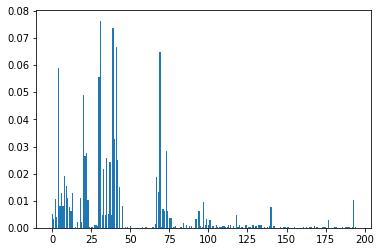

In [ ]:
# summarize feature importance
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

#### 2.5.2.2. Interprétation avec Lime

Intercept 0.8080856690734025
Prediction_local [0.79652037]
Right: 0.13175210194966727


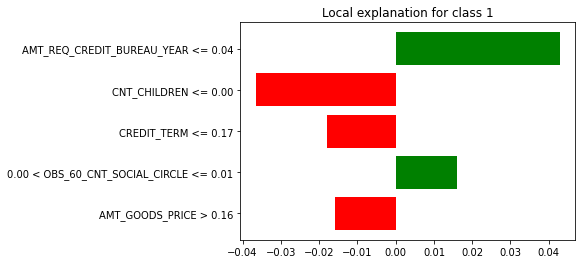

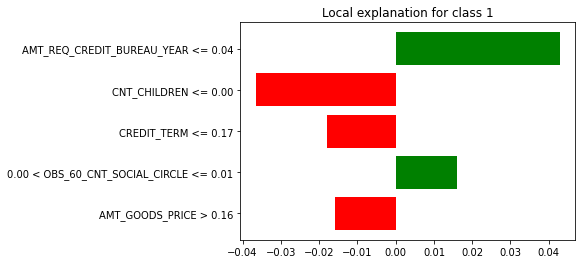

In [ ]:
# Choose the jth instance and use it to predict the results for that selection
j = 1
exp_RFG = explainer.explain_instance(X.values[j], grid_rfc.predict_proba, num_features=5)

exp_RFG.show_in_notebook(show_table=True)
exp_RFG.as_pyplot_figure()

#### <span style='color:green'> 3. Resultat des métriques</span>

In [ ]:
models = [LogisticRegression(),xgb.XGBClassifier(),lgb.LGBMClassifier(),RandomForestClassifier()]

In [ ]:
def train_models(model, X_train_SMOTE, X_test, y_train_SMOTE, y_test):
    model.fit(X_train_SMOTE, y_train_SMOTE)
    output = {
      'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
      'Accurancy': accuracy_score(y_test, model.predict(X_test)),
      'Score custom' : custom_metric(y_test, model.predict(X_test))}
   
    return output

In [ ]:
%%time

name = []
auc = []
accuracy = []
custom_score = []
time_ = []

for model in models:
    start = time.time()
    results = train_models(model, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accurancy'])
    custom_score.append(results['Score custom'])
    time_.append(time.time()-start)

#Initialise data of lists
base_models = pd.DataFrame(data=[name, auc, accuracy, custom_score, time_]).T
base_models.columns = ['Model', 'AUC', 'Accurancy','Score custom','Time']
base_models.sort_values('AUC', ascending=False, inplace=True)
base_models

CPU times: user 9min 47s, sys: 10.8 s, total: 9min 58s
Wall time: 9min 35s


In [ ]:
base_models

Model       AUC Accurancy Score custom     Time
2          LGBMClassifier  0.741376  0.919581     0.602977  43.0968
0      LogisticRegression   0.73633  0.692729     0.579606  22.4765
3  RandomForestClassifier  0.704171   0.91789     0.602196  273.956
1           XGBClassifier  0.703975  0.917185     0.603659  236.391